# 🚢 Titanic Survival Prediction

We'll explore the dataset, prepare it for modeling, and apply both **deep learning** and **machine learning** techniques. Finally, we'll visualize the results for better insights.

📌 **Dataset:** [Titanic Kaggle Data](https://www.kaggle.com/c/titanic/data)  
📊 **Methods:** Exploratory data analysis, feature engineering, visualization, deep learning and machine learning classification models  

---

<div style="text-align: center;">
    <img src="https://images.nationalgeographic.org/image/upload/v1638882458/EducationHub/photos/titanic-sinking.jpg" alt="Image">
</div>


### Data Dictionary

survival = Survival	(Key:0 = No, 1 = Yes)

pclass = Ticket class (Key: 1 = 1st, 2 = 2nd, 3 = 3rd)

sex = Sex	

Age = Age in years	

sibsp = of siblings / spouses aboard the Titanic

parch = of parents / children aboard the Titanic

ticket = Ticket number	

fare = Passenger fare	

cabin = Cabin number	

embarked = Port of Embarkation (Key: C = Cherbourg, Q = Queenstown, S = Southampton)

#### Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)


parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

### Importing the necessary packages

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, scale
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

### Importing the data

In [2]:
df = pd.read_csv('titanic.csv')

### EDA - Exploratory Data Analysis 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.shape

(891, 12)

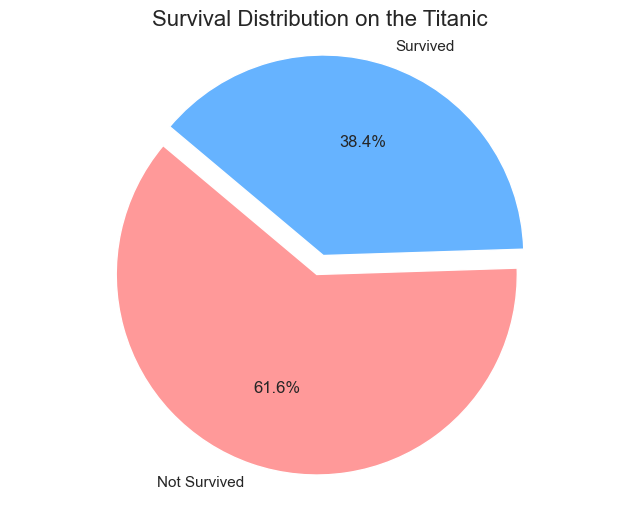

In [9]:
#survival distribution on the titanic
survival_counts = df['Survived'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=140,
        colors=['#ff9999','#66b3ff'], explode=(0.1, 0))
plt.title('Survival Distribution on the Titanic', fontsize=16)
plt.axis('equal')
plt.show()

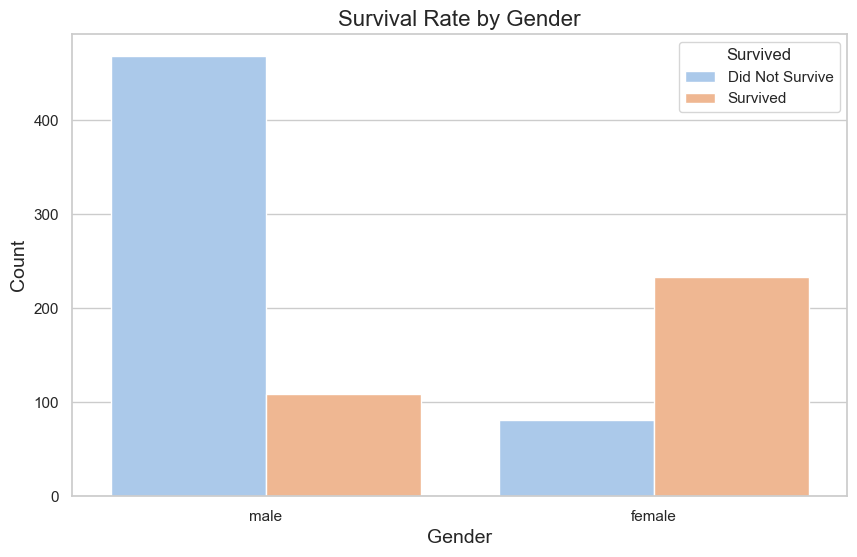

In [10]:
#survival rate by gender
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title('Survival Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

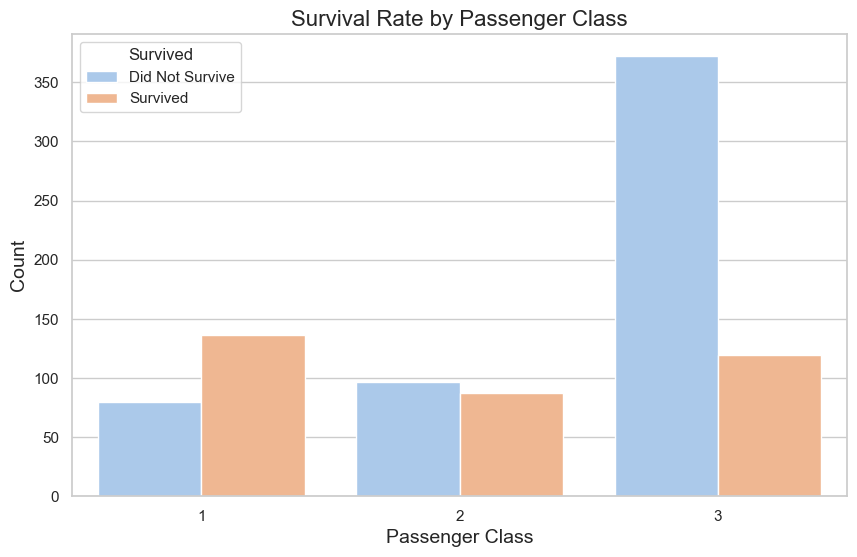

In [11]:
#survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel')
plt.title('Survival Rate by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

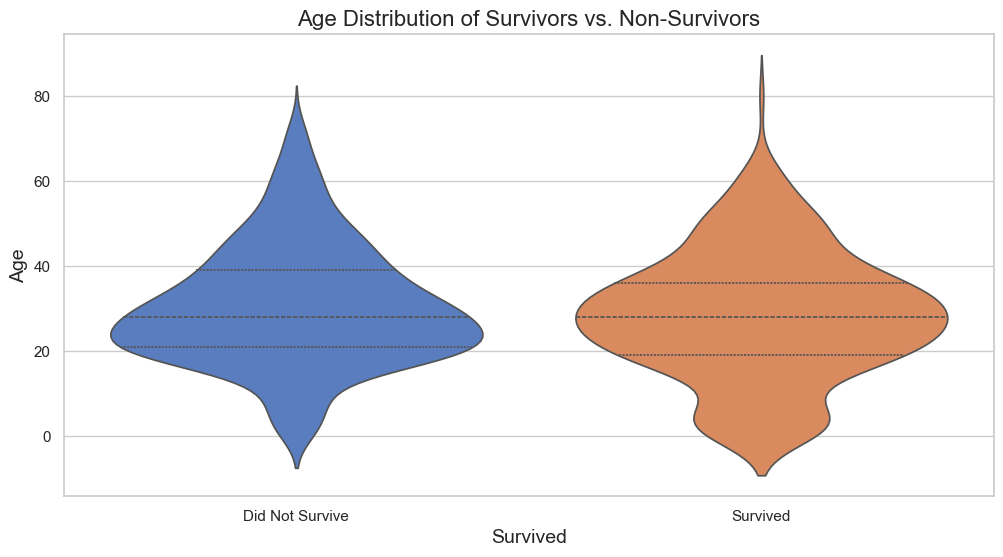

In [12]:
#age distribution of survivors vs. non-survivors
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Survived', y='Age', palette='muted', inner='quartile')
plt.title('Age Distribution of Survivors vs. Non-Survivors', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'])
plt.show()

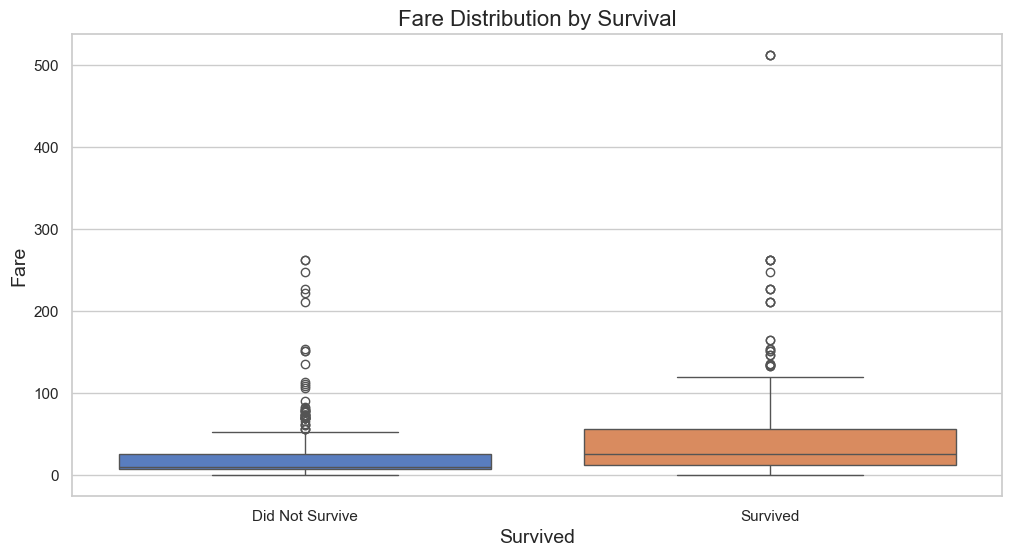

In [13]:
#fare distribution by survival
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Survived', y='Fare', palette='muted')
plt.title('Fare Distribution by Survival', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'])
plt.show()

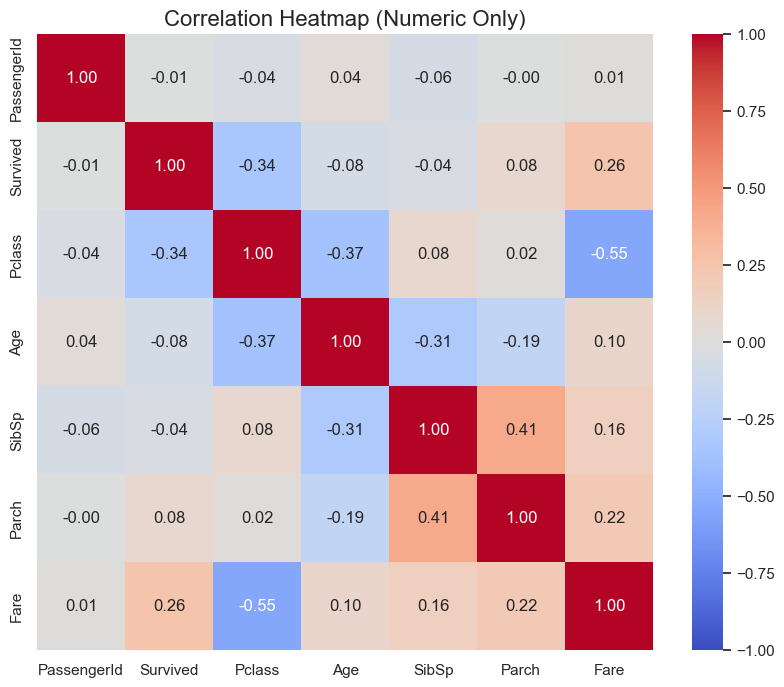

In [14]:
#correlation matrix for numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, vmax=1, vmin=-1)
plt.title('Correlation Heatmap (Numeric Only)', fontsize=16)
plt.show()

### Feature Engineering

In [15]:
#filling the empty rows with median and mode
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [16]:
#mapping the gender
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [17]:
#fixing the confusion in the column 'Name'
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.')
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme', 'Countess','Lady', 'Dona'], 'Mrs')
df['Title']=df['Title'].replace(['Rev', 'Dr', 'Col','Major','Sir', 'Don', 'Capt', 'Jonkheer'],'Mr') 

In [18]:
#calculating the absolute correlations with the 'Survived' column
correlation = abs(df.corr(numeric_only=True)['Survived']).sort_values(ascending=False)
print(correlation)

Survived       1.000000
Sex            0.543351
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.064910
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64


In [19]:
#squaring the highly correlated values
df['Sex']=df['Sex']**2
df['Pclass']=df['Pclass']**2

### Deep Learning Modelling

In [20]:
x=df.drop(['PassengerId','Name','Ticket', 'Cabin', 'Survived'], axis=1)
y=df[['Survived']]

In [21]:
#encoding and train test split
x=pd.get_dummies(x,drop_first=True)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [22]:
#scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#building the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
#training the model
history=model.fit(x_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2,verbose=0)

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

In [25]:
#making predictions
y_pred_probs = model.predict(x_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [26]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       105
           1       0.80      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



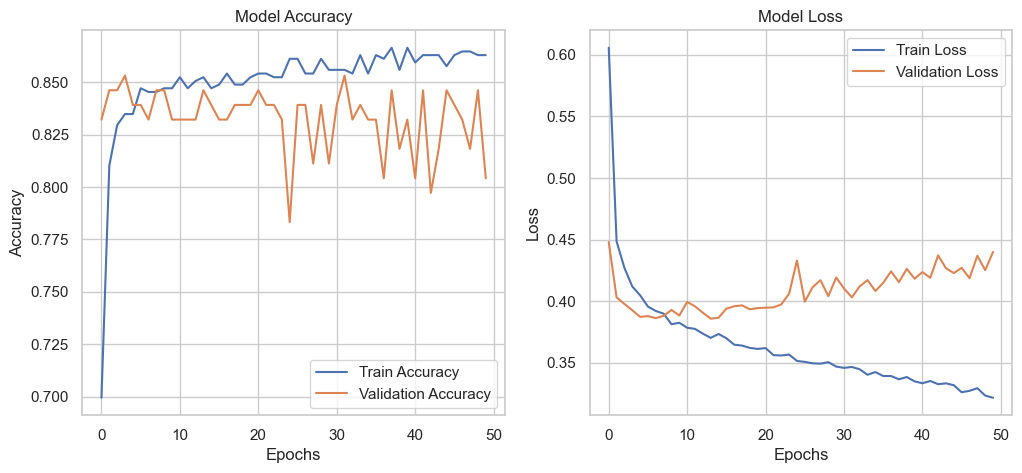

In [27]:
#accuracy and loss graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

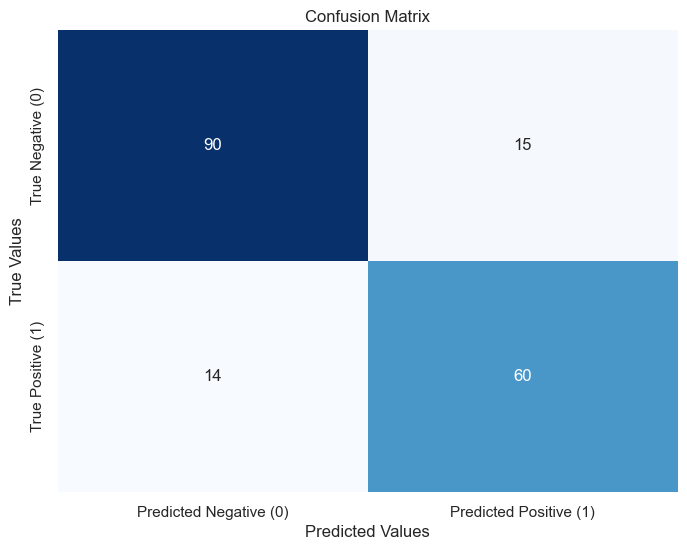

In [28]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["True Negative (0)", "True Positive (1)"], columns=["Predicted Negative (0)", "Predicted Positive (1)"])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

### Machine Learning Modelling

In [29]:
#initializing the models
models = {
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB()
}

#training and evaluating each model
results = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report
    }

In [30]:
#displaying the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(result['classification_report'])
    print("=" * 50)

Model: GradientBoostingClassifier
Accuracy: 0.8324
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179

Model: RandomForestClassifier
Accuracy: 0.8268
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       105
           1       0.78      0.81      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Model: GaussianNB
Accuracy: 0.7765
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78      

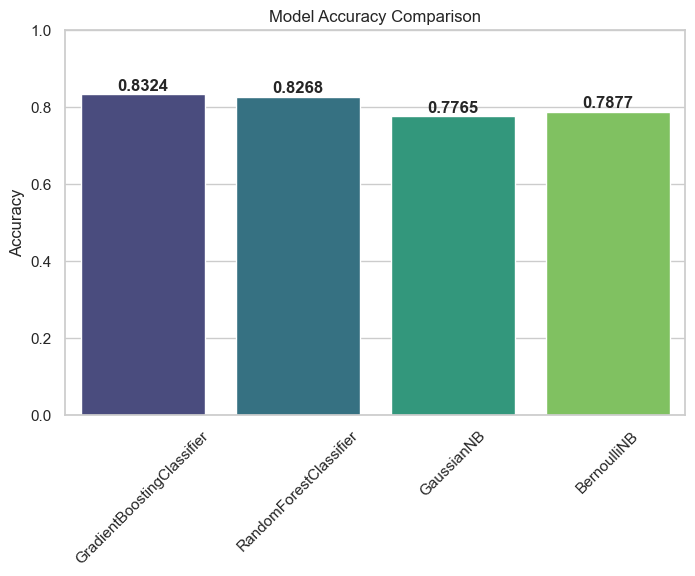

In [31]:
#model accuracy comparison
model_names = list(results.keys())
accuracies = [results[m]['accuracy'] for m in model_names]
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=model_names, y=accuracies, palette="viridis")
for i, v in enumerate(accuracies):
    ax.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12, fontweight='bold')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

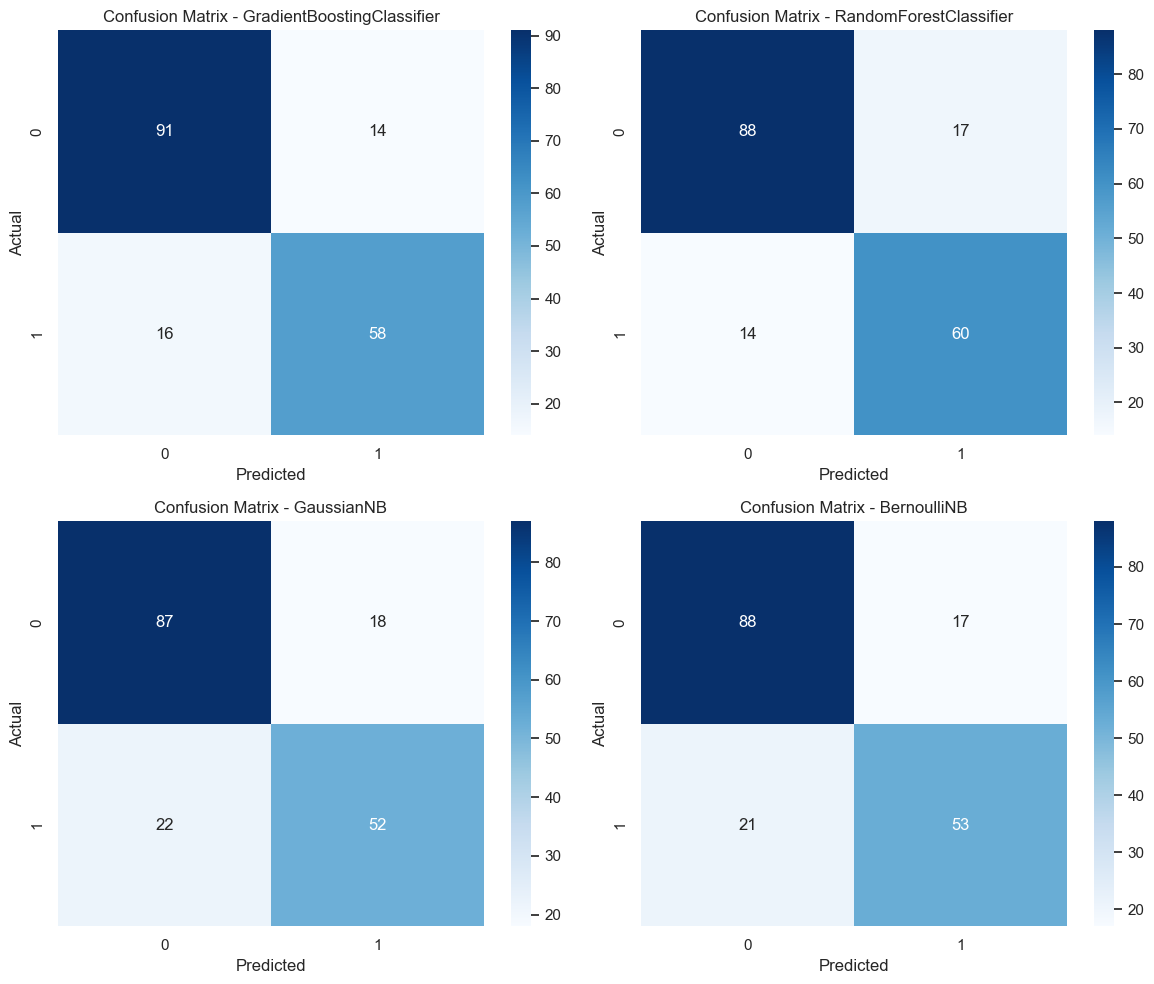

In [32]:
#confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for idx, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    ax = axes[idx // 2, idx % 2]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Confusion Matrix - {model_name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

## Conclusion and Results

After applying both **Deep Learning** and **Machine Learning** approaches, we evaluated their performance using accuracy, precision, recall, and F1-scores.

🔍 **Key Findings:**
- **Deep Learning Model** achieved **84% accuracy**, demonstrating strong predictive capability.
- **GradientBoostingClassifier** performed best among ML models with **83.24% accuracy**.
- **RandomForestClassifier** followed closely at **82.68% accuracy**.
- **GaussianNB & BernoulliNB** showed lower accuracy (~79%).

### 📈 Model Performance Overview:
| Model                     | Accuracy | Precision (Class 0) | Precision (Class 1) | F1-score (Avg) |
|---------------------------|----------|----------------------|----------------------|---------------|
| **Deep Learning Model**    | **84.00%**  | 0.87                 | 0.80                 | 0.84          |
| GradientBoostingClassifier | **83.24%**  | 0.85                 | 0.81                 | 0.83          |
| RandomForestClassifier     | **82.68%**  | 0.86                 | 0.78                 | 0.82          |
| GaussianNB                 | **77.65%**  | 0.80                 | 0.74                 | 0.77          |
| BernoulliNB                | **78.77%**  | 0.81                 | 0.76                 | 0.78          |

📊 **Visualizations provide further insights into misclassifications and class distributions.**  
The **deep learning model outperformed traditional ML models**, showcasing its capability for handling complex patterns in the dataset.